<a href="https://colab.research.google.com/github/vsjamwal/Algo-trading-Strategies-/blob/main/Predictive_Modeling_NSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import yfinance as yf
import pandas as pd
import numpy as np

# Define the stock symbols for the selected 23 stocks
stock_symbols = [
    'LT.NS', 'SBIN.NS', 'RELIANCE.NS',
    'TCS.NS', 'INFY.NS',
    'ICICIBANK.NS', 'HINDUNILVR.NS', 'ITC.NS',
    'KOTAKBANK.NS', 'WIPRO.NS',
    'HCLTECH.NS', 'ASIANPAINT.NS', 'ONGC.NS',
    'BAJFINANCE.NS', 'MARUTI.NS', 'TATASTEEL.NS',
    'NTPC.NS', 'TECHM.NS', 'NESTLEIND.NS',
    'BAJAJFINSV.NS', 'POWERGRID.NS', 'ULTRACEMCO.NS'
]

# Define the start and end dates for the analysis
start_date = '2010-01-01'
end_date = '2023-11-02'

# Convert start_date and end_date to datetime objects
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Create an empty DataFrame to store the stock data
stock_data = pd.DataFrame()

# Download historical stock price data for each stock
for symbol in stock_symbols:
    data = yf.download(symbol, start=start_date, end=end_date)
    stock_data[symbol] = data['Adj Close']

# Calculate CAGR for each stock
cagr_values = {}
for symbol in stock_symbols:
    data = stock_data[symbol]
    start_price = data.iloc[0]
    end_price = data.iloc[-1]
    years = (end_date - start_date).days / 365.0
    cagr = (end_price / start_price) ** (1 / years) - 1
    cagr_values[symbol] = cagr * 100  # Convert to percentage

# Calculate VAR at 95% confidence level
confidence_level = 0.95
var_95 = {}
for symbol in stock_symbols:
    data = stock_data[symbol]
    returns = data.pct_change().dropna()
    var_95[symbol] = -np.percentile(returns, 100 * (1 - confidence_level))

# Calculate annualized volatility
volatility = {}
for symbol in stock_symbols:
    returns = stock_data[symbol].pct_change().dropna()
    annual_volatility = returns.std() * np.sqrt(252)  # Assuming 252 trading days in a year
    volatility[symbol] = annual_volatility

# Assuming a risk-free rate of 2% for Sharpe ratio calculation
risk_free_rate = 0.02
sharpe_ratio = {}
for symbol in stock_symbols:
    excess_returns = stock_data[symbol].pct_change().dropna() - risk_free_rate / 252
    sharpe_ratio[symbol] = (excess_returns.mean() / excess_returns.std()) * np.sqrt(252)

# Create a DataFrame to present the results
results = pd.DataFrame({
    'Stock Symbol': stock_symbols,
    'CAGR (%)': [cagr_values[symbol] for symbol in stock_symbols],
    'VAR at 95% Confidence (%)': [var_95[symbol] * 100 for symbol in stock_symbols],
    'Annualized Volatility (%)': [volatility[symbol] * 100 for symbol in stock_symbols],
    'Sharpe Ratio': [sharpe_ratio[symbol] for symbol in stock_symbols]
})


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [23]:
results

,Stock Symbol,CAGR (%),VAR at 95% Confidence (%),Annualized Volatility (%),Sharpe Ratio
0,LT.NS,11.777864,2.630640,28.589457,0.470783
1,SBIN.NS,7.978127,3.178281,33.487330,0.340435
2,RELIANCE.NS,11.955736,2.566642,27.898934,0.481183
3,TCS.NS,19.397222,2.352063,25.091545,0.767778
4,INFY.NS,13.322124,2.325648,27.470141,0.531284
5,ICICIBANK.NS,14.827704,3.007213,32.587907,0.534746
6,HINDUNILVR.NS,19.642825,2.093831,23.712282,0.805978
7,ITC.NS,15.114976,2.241474,24.971866,0.621492
8,KOTAKBANK.NS,16.684141,2.708448,28.060417,0.630912
9,WIPRO.NS,7.684610,2.498168,26.020393,0.343828


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

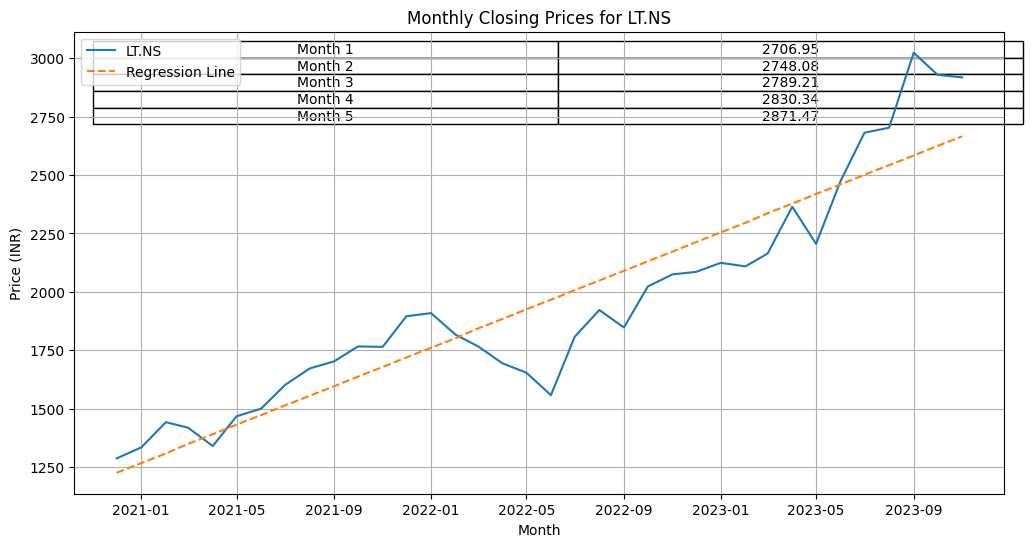

Regression Model for SBIN.NS:
R-squared: 0.7946699814095943
P-value for the coefficient: 3.1012704897951345e-13
                            OLS Regression Results                            
Dep. Variable:                SBIN.NS   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     131.6
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           3.10e-13
Time:                        05:26:56   Log-Likelihood:                -183.30
No. Observations:                  36   AIC:                             370.6
Df Residuals:                      34   BIC:                             373.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------

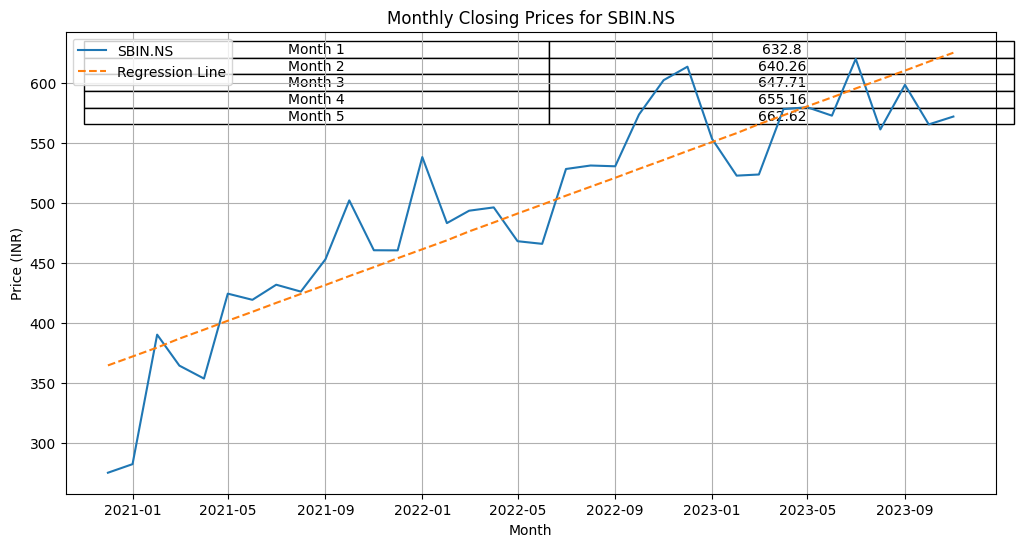

Regression Model for RELIANCE.NS:
R-squared: 0.28174570040364566
P-value for the coefficient: 0.0008670105648508402
                            OLS Regression Results                            
Dep. Variable:            RELIANCE.NS   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     13.34
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           0.000867
Time:                        05:26:56   Log-Likelihood:                -240.03
No. Observations:                  36   AIC:                             484.1
Df Residuals:                      34   BIC:                             487.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------

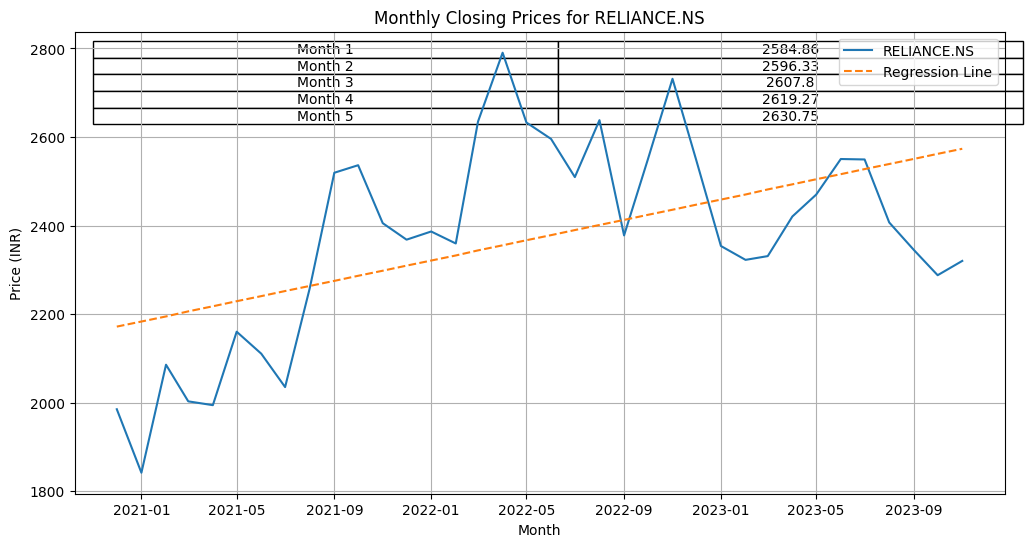

Regression Model for TCS.NS:
R-squared: 0.02197957886481905
P-value for the coefficient: 0.3881811533851399
                            OLS Regression Results                            
Dep. Variable:                 TCS.NS   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.7641
Date:                Fri, 03 Nov 2023   Prob (F-statistic):              0.388
Time:                        05:26:57   Log-Likelihood:                -246.42
No. Observations:                  36   AIC:                             496.8
Df Residuals:                      34   BIC:                             500.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

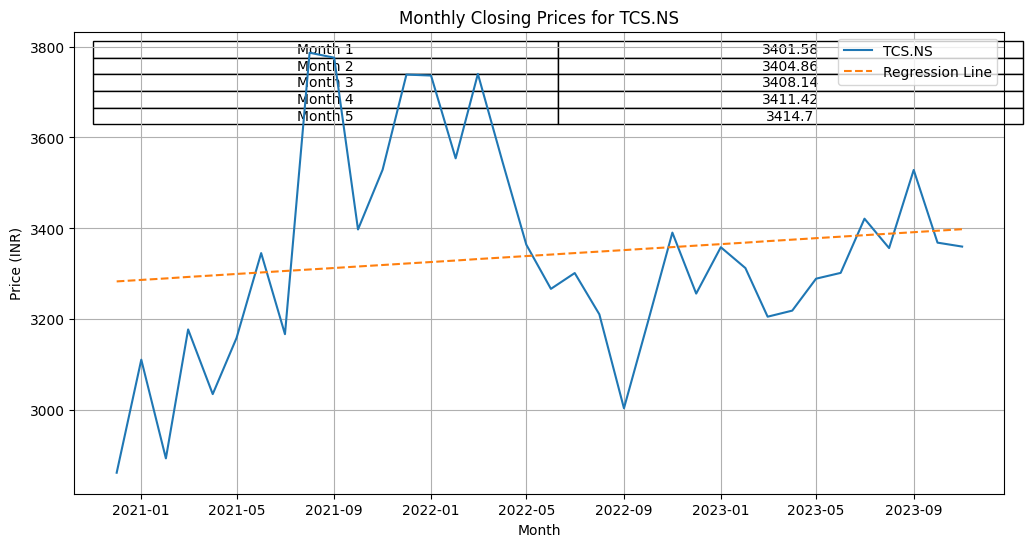

Regression Model for INFY.NS:
R-squared: 0.02730454394842241
P-value for the coefficient: 0.33549848342657385
                            OLS Regression Results                            
Dep. Variable:                INFY.NS   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9544
Date:                Fri, 03 Nov 2023   Prob (F-statistic):              0.335
Time:                        05:26:58   Log-Likelihood:                -235.62
No. Observations:                  36   AIC:                             475.2
Df Residuals:                      34   BIC:                             478.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------

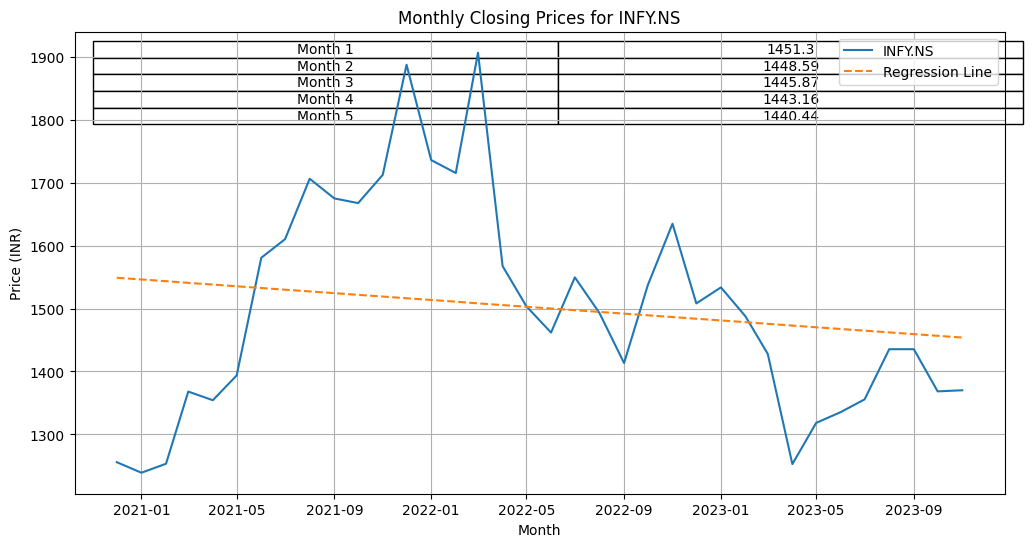

Regression Model for ICICIBANK.NS:
R-squared: 0.880017825658141
P-value for the coefficient: 3.192389975076095e-17
                            OLS Regression Results                            
Dep. Variable:           ICICIBANK.NS   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     249.4
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           3.19e-17
Time:                        05:26:59   Log-Likelihood:                -188.16
No. Observations:                  36   AIC:                             380.3
Df Residuals:                      34   BIC:                             383.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------

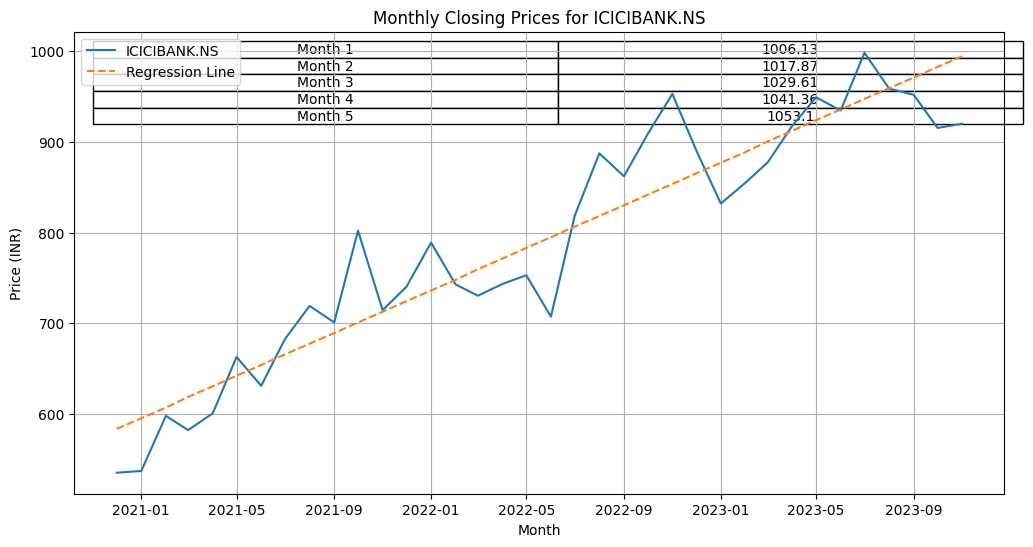

Regression Model for HINDUNILVR.NS:
R-squared: 0.1917144581264777
P-value for the coefficient: 0.007568579296934302
                            OLS Regression Results                            
Dep. Variable:          HINDUNILVR.NS   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     8.064
Date:                Fri, 03 Nov 2023   Prob (F-statistic):            0.00757
Time:                        05:26:59   Log-Likelihood:                -232.78
No. Observations:                  36   AIC:                             469.6
Df Residuals:                      34   BIC:                             472.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------

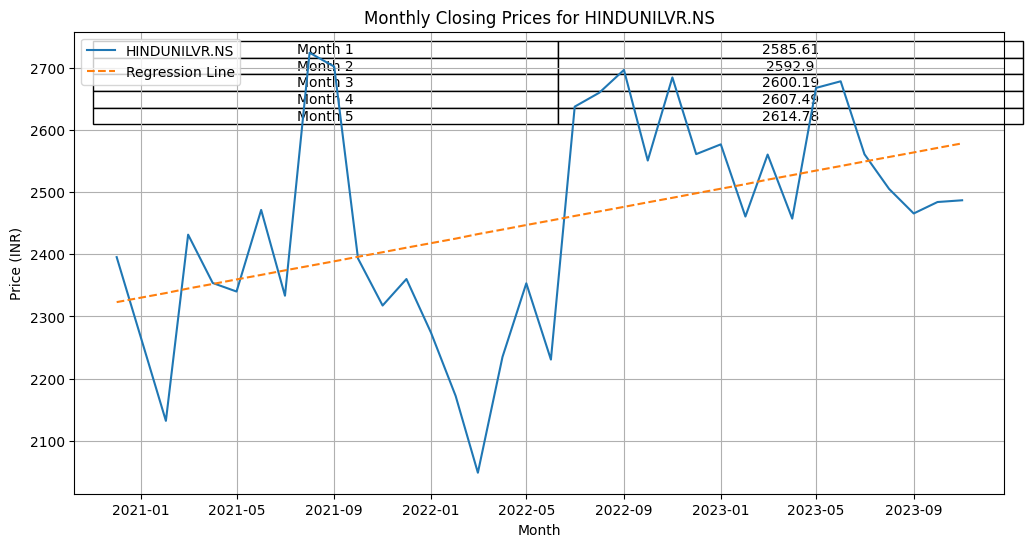

Regression Model for ITC.NS:
R-squared: 0.9042664301694603
P-value for the coefficient: 6.787085847788421e-19
                            OLS Regression Results                            
Dep. Variable:                 ITC.NS   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     321.2
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           6.79e-19
Time:                        05:27:00   Log-Likelihood:                -171.45
No. Observations:                  36   AIC:                             346.9
Df Residuals:                      34   BIC:                             350.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------

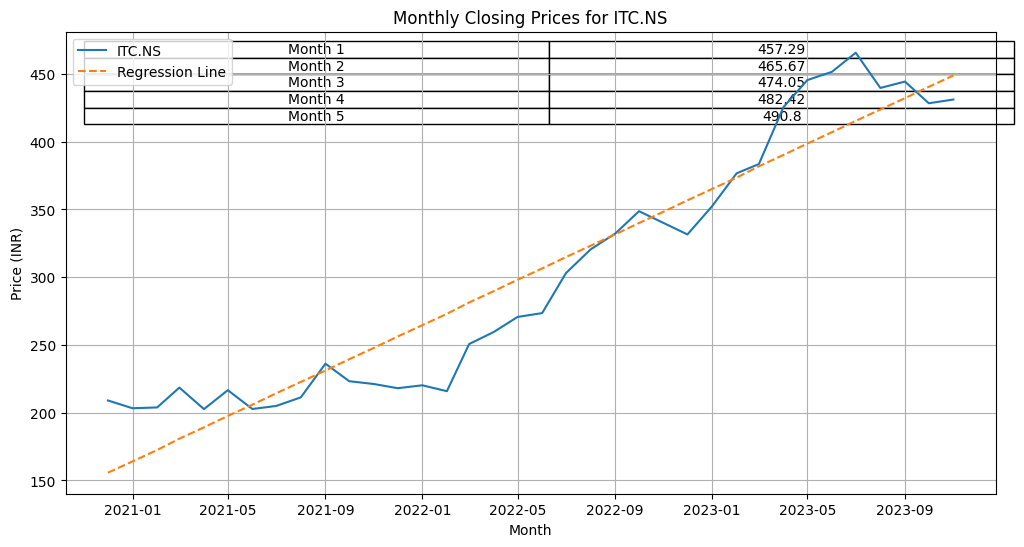

Regression Model for KOTAKBANK.NS:
R-squared: 0.00025949952091919304
P-value for the coefficient: 0.9257059315080624
                            OLS Regression Results                            
Dep. Variable:           KOTAKBANK.NS   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.029
Method:                 Least Squares   F-statistic:                  0.008825
Date:                Fri, 03 Nov 2023   Prob (F-statistic):              0.926
Time:                        05:27:00   Log-Likelihood:                -217.10
No. Observations:                  36   AIC:                             438.2
Df Residuals:                      34   BIC:                             441.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------

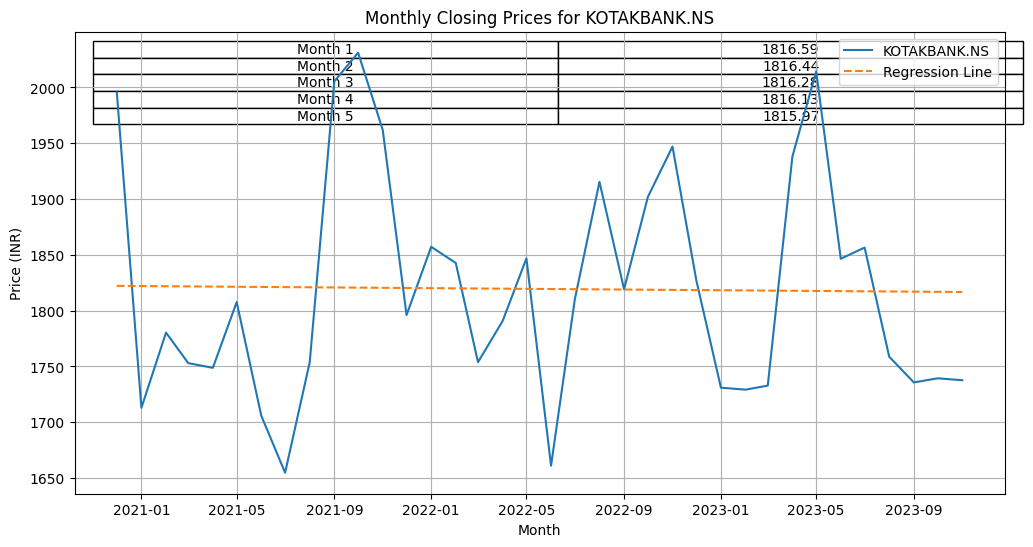

Regression Model for WIPRO.NS:
R-squared: 0.27866104944231807
P-value for the coefficient: 0.0009368945953678092
                            OLS Regression Results                            
Dep. Variable:               WIPRO.NS   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     13.13
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           0.000937
Time:                        05:27:01   Log-Likelihood:                -210.50
No. Observations:                  36   AIC:                             425.0
Df Residuals:                      34   BIC:                             428.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------

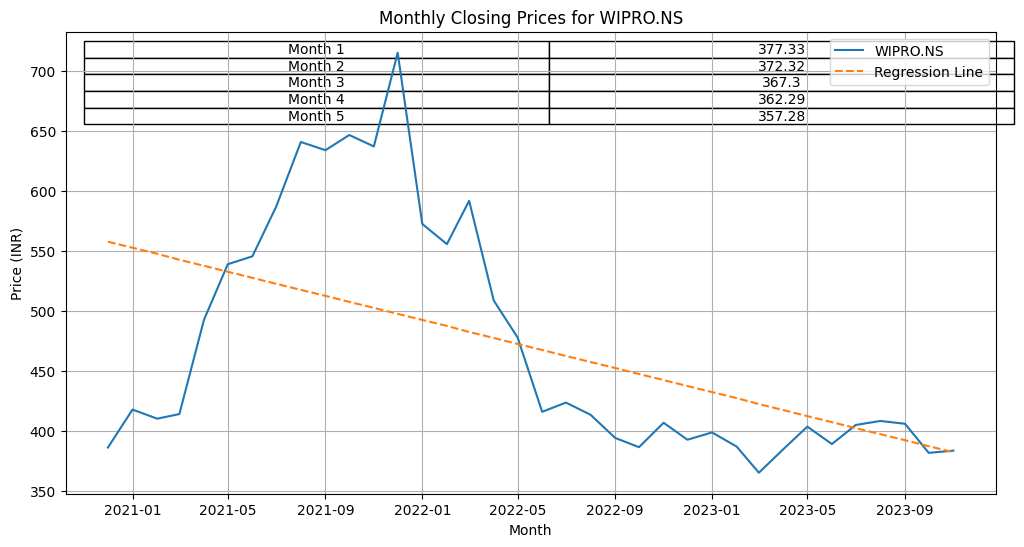

Regression Model for HCLTECH.NS:
R-squared: 0.24899229364138198
P-value for the coefficient: 0.0019491170746835406
                            OLS Regression Results                            
Dep. Variable:             HCLTECH.NS   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     11.27
Date:                Fri, 03 Nov 2023   Prob (F-statistic):            0.00195
Time:                        05:27:01   Log-Likelihood:                -216.75
No. Observations:                  36   AIC:                             437.5
Df Residuals:                      34   BIC:                             440.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------

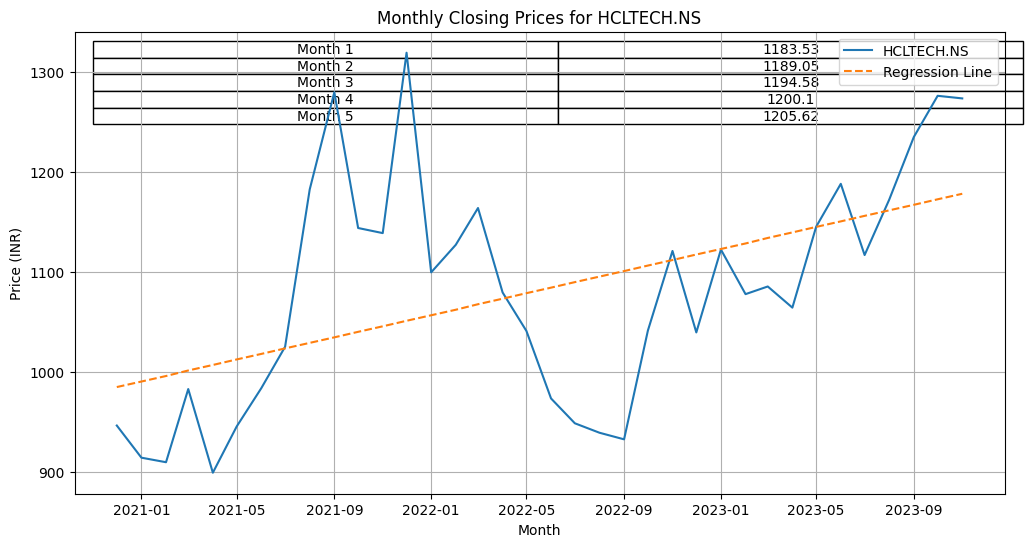

Regression Model for ASIANPAINT.NS:
R-squared: 0.1761330544162002
P-value for the coefficient: 0.010831322730198448
                            OLS Regression Results                            
Dep. Variable:          ASIANPAINT.NS   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     7.269
Date:                Fri, 03 Nov 2023   Prob (F-statistic):             0.0108
Time:                        05:27:02   Log-Likelihood:                -250.69
No. Observations:                  36   AIC:                             505.4
Df Residuals:                      34   BIC:                             508.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------

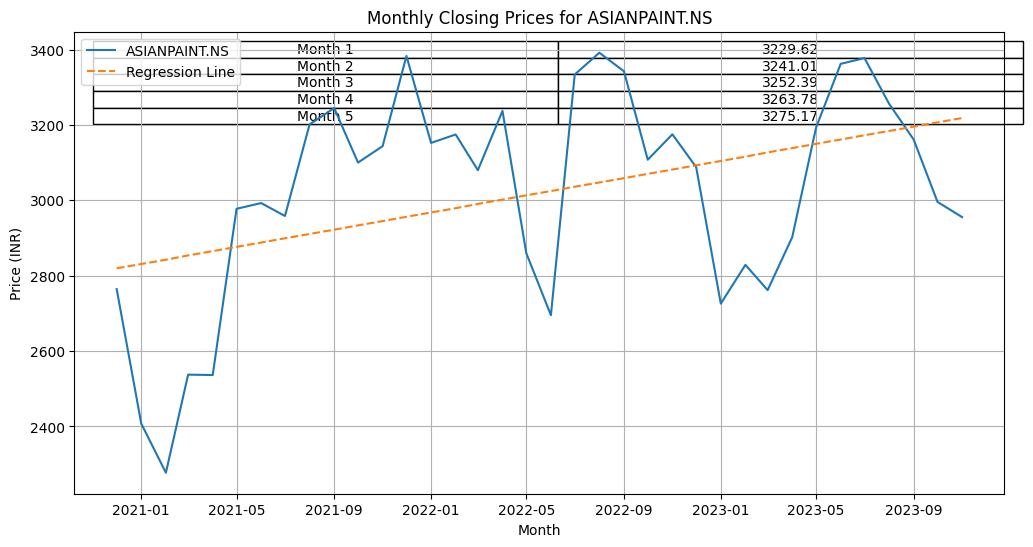

Regression Model for ONGC.NS:
R-squared: 0.6732928335769146
P-value for the coefficient: 8.993398933059372e-10
                            OLS Regression Results                            
Dep. Variable:                ONGC.NS   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     70.07
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           8.99e-10
Time:                        05:27:02   Log-Likelihood:                -147.85
No. Observations:                  36   AIC:                             299.7
Df Residuals:                      34   BIC:                             302.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------

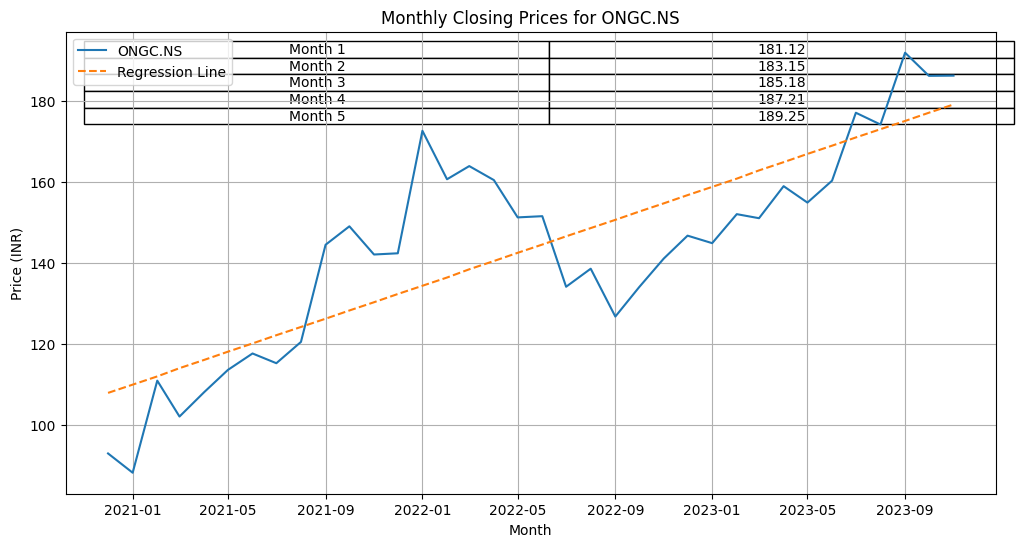

Regression Model for BAJFINANCE.NS:
R-squared: 0.2742885840718283
P-value for the coefficient: 0.0010452382093590837
                            OLS Regression Results                            
Dep. Variable:          BAJFINANCE.NS   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     12.85
Date:                Fri, 03 Nov 2023   Prob (F-statistic):            0.00105
Time:                        05:27:03   Log-Likelihood:                -287.43
No. Observations:                  36   AIC:                             578.9
Df Residuals:                      34   BIC:                             582.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------

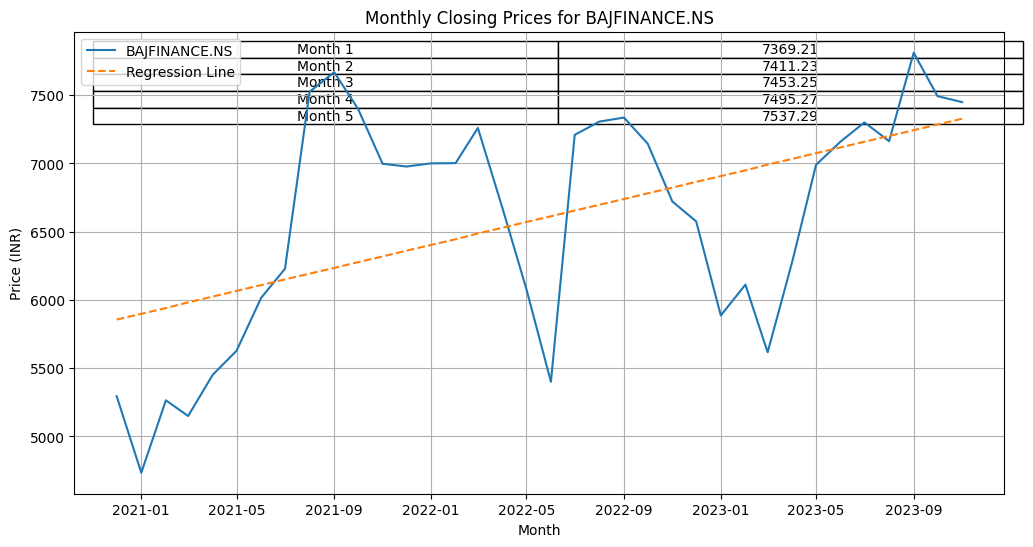

Regression Model for MARUTI.NS:
R-squared: 0.825518058267702
P-value for the coefficient: 1.9137582676224986e-14
                            OLS Regression Results                            
Dep. Variable:              MARUTI.NS   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     160.9
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           1.91e-14
Time:                        05:27:04   Log-Likelihood:                -272.75
No. Observations:                  36   AIC:                             549.5
Df Residuals:                      34   BIC:                             552.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------

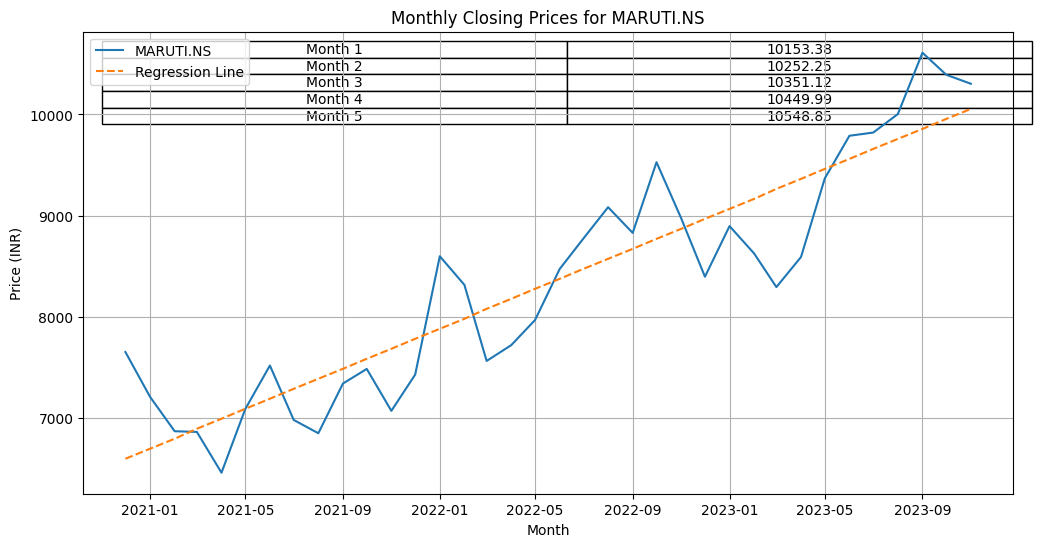

Regression Model for TATASTEEL.NS:
R-squared: 0.10520771215405866
P-value for the coefficient: 0.05360645235011609
                            OLS Regression Results                            
Dep. Variable:           TATASTEEL.NS   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     3.998
Date:                Fri, 03 Nov 2023   Prob (F-statistic):             0.0536
Time:                        05:27:04   Log-Likelihood:                -154.84
No. Observations:                  36   AIC:                             313.7
Df Residuals:                      34   BIC:                             316.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------

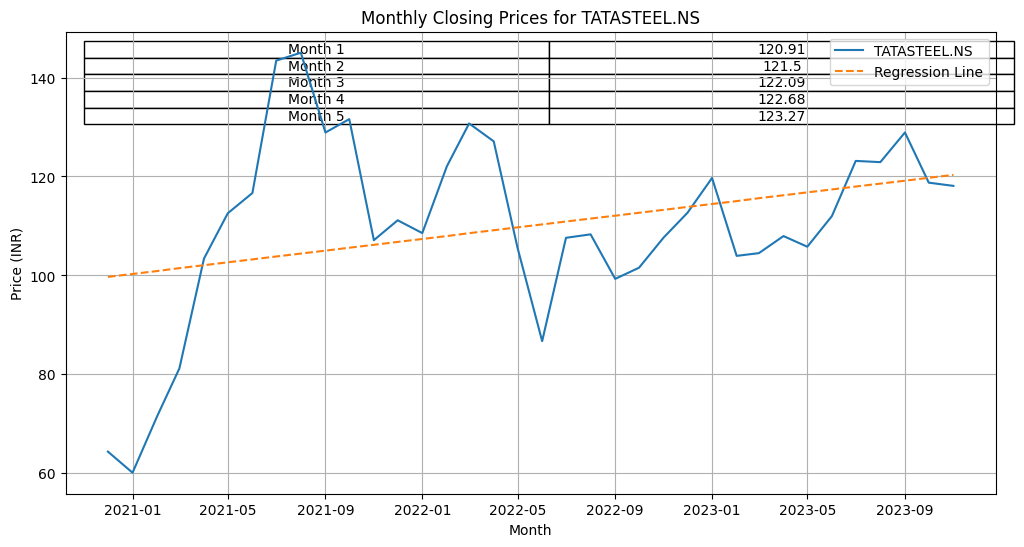

Regression Model for NTPC.NS:
R-squared: 0.9077222390384634
P-value for the coefficient: 3.6262912541079376e-19
                            OLS Regression Results                            
Dep. Variable:                NTPC.NS   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     334.5
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           3.63e-19
Time:                        05:27:05   Log-Likelihood:                -141.04
No. Observations:                  36   AIC:                             286.1
Df Residuals:                      34   BIC:                             289.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------

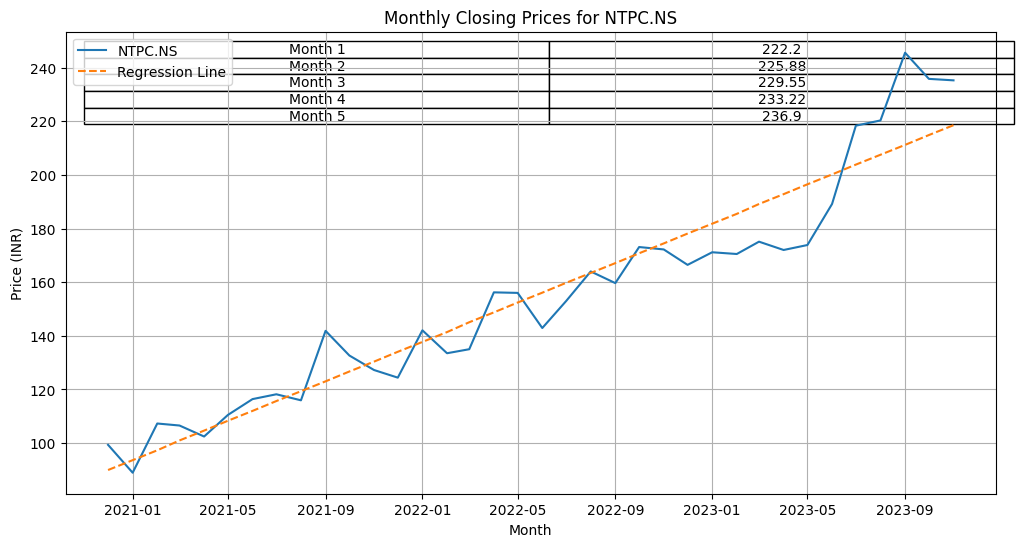

Regression Model for TECHM.NS:
R-squared: 0.007239029268154895
P-value for the coefficient: 0.6217477130327821
                            OLS Regression Results                            
Dep. Variable:               TECHM.NS   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                    0.2479
Date:                Fri, 03 Nov 2023   Prob (F-statistic):              0.622
Time:                        05:27:05   Log-Likelihood:                -241.84
No. Observations:                  36   AIC:                             487.7
Df Residuals:                      34   BIC:                             490.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------

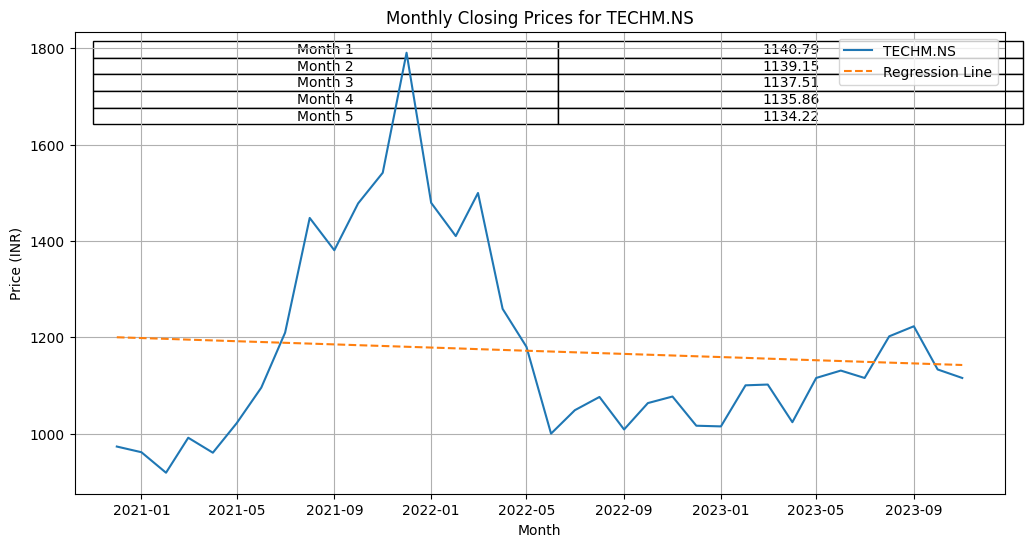

Regression Model for NESTLEIND.NS:
R-squared: 0.7018496494100197
P-value for the coefficient: 1.8633576435564905e-10
                            OLS Regression Results                            
Dep. Variable:           NESTLEIND.NS   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     80.04
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           1.86e-10
Time:                        05:27:06   Log-Likelihood:                -304.18
No. Observations:                  36   AIC:                             612.4
Df Residuals:                      34   BIC:                             615.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------

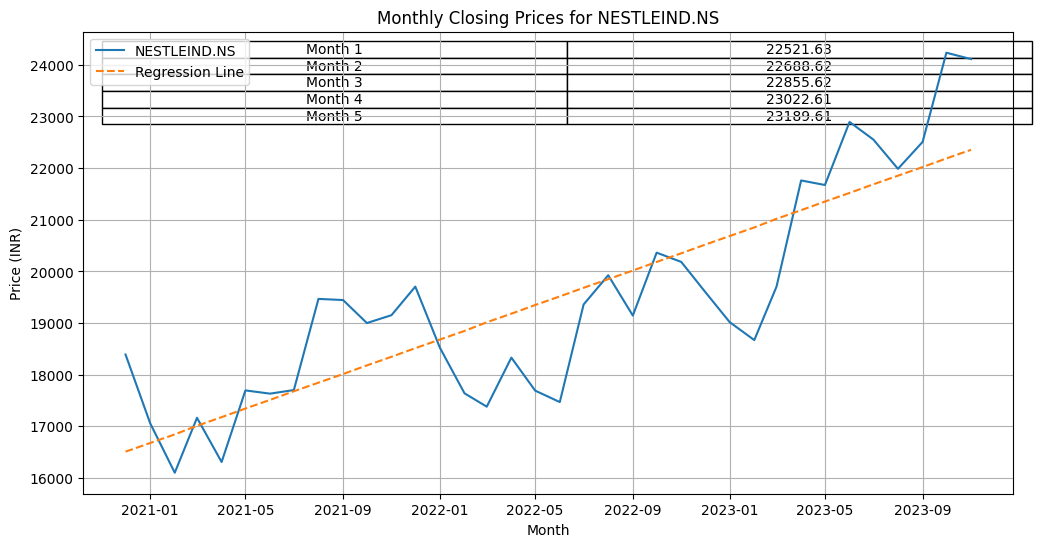

Regression Model for BAJAJFINSV.NS:
R-squared: 0.18467662241055738
P-value for the coefficient: 0.008902878399876185
                            OLS Regression Results                            
Dep. Variable:          BAJAJFINSV.NS   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     7.701
Date:                Fri, 03 Nov 2023   Prob (F-statistic):            0.00890
Time:                        05:27:06   Log-Likelihood:                -247.08
No. Observations:                  36   AIC:                             498.2
Df Residuals:                      34   BIC:                             501.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------

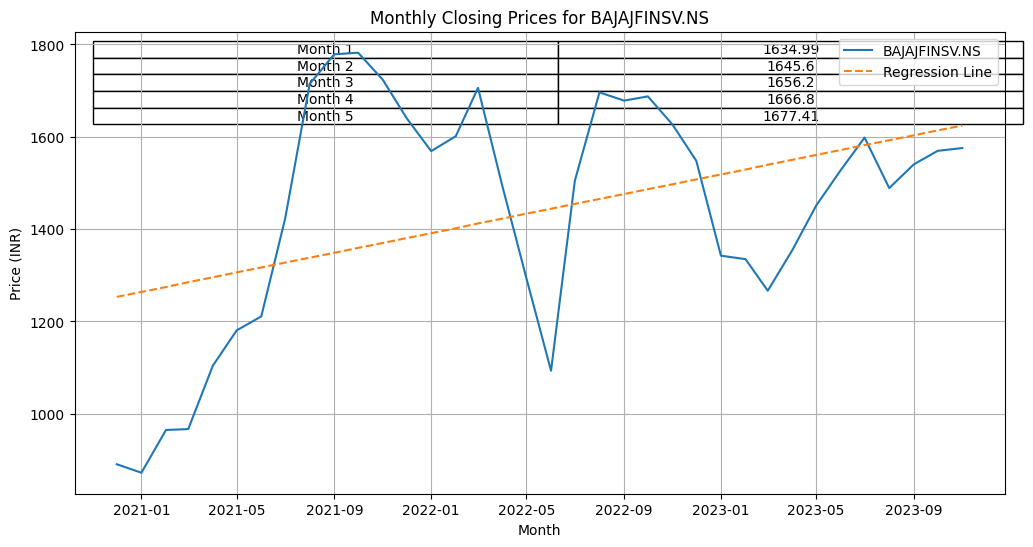

Regression Model for POWERGRID.NS:
R-squared: 0.8903806313459642
P-value for the coefficient: 6.836446209523876e-18
                            OLS Regression Results                            
Dep. Variable:           POWERGRID.NS   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     276.2
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           6.84e-18
Time:                        05:27:07   Log-Likelihood:                -128.71
No. Observations:                  36   AIC:                             261.4
Df Residuals:                      34   BIC:                             264.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------

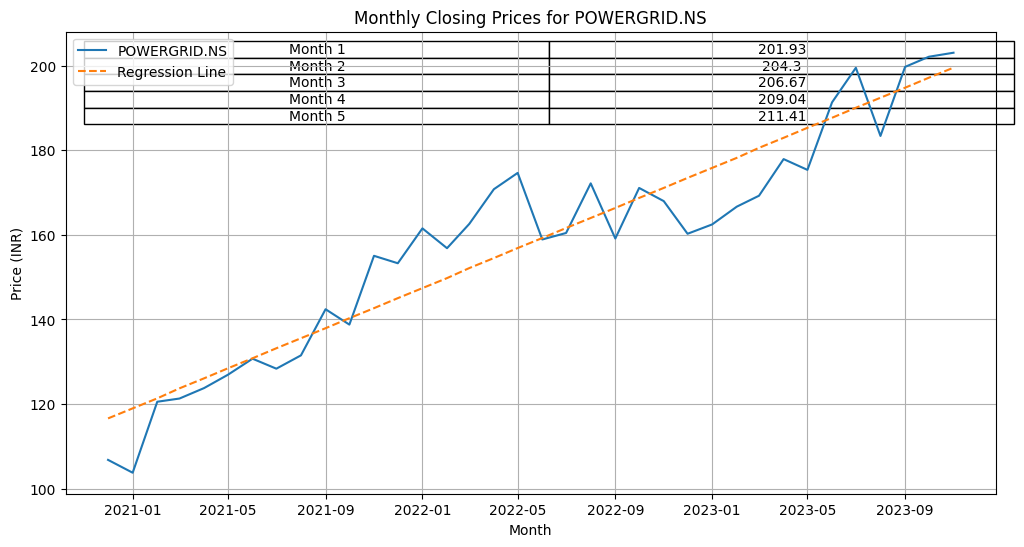

Regression Model for ULTRACEMCO.NS:
R-squared: 0.41957999003137536
P-value for the coefficient: 1.94906982334474e-05
                            OLS Regression Results                            
Dep. Variable:          ULTRACEMCO.NS   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     24.58
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           1.95e-05
Time:                        05:27:07   Log-Likelihood:                -283.94
No. Observations:                  36   AIC:                             571.9
Df Residuals:                      34   BIC:                             575.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------

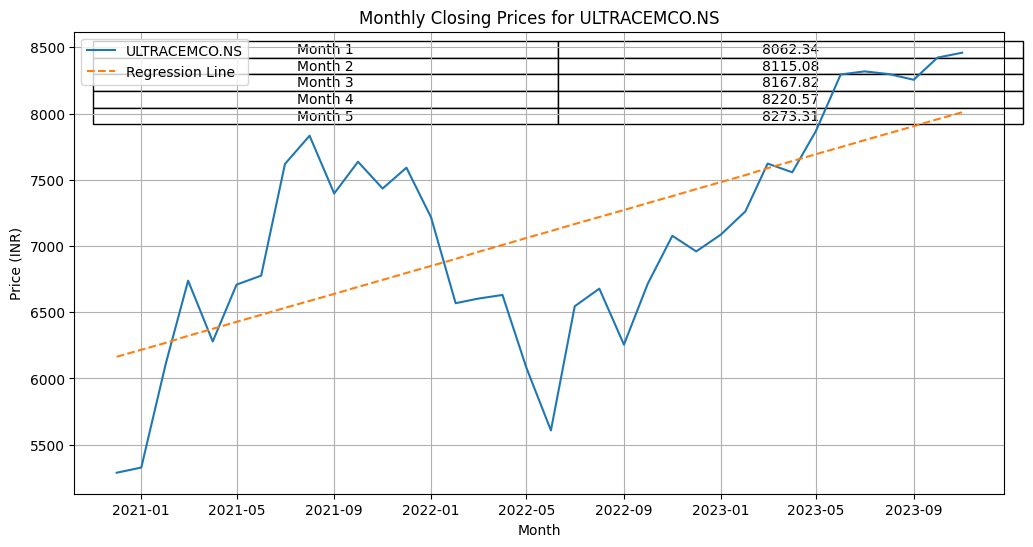

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
import statsmodels.api as sm

# Define the stock symbols
symbols = [
    'LT.NS', 'SBIN.NS', 'RELIANCE.NS',
    'TCS.NS', 'INFY.NS',
    'ICICIBANK.NS', 'HINDUNILVR.NS', 'ITC.NS',
    'KOTAKBANK.NS', 'WIPRO.NS',
    'HCLTECH.NS', 'ASIANPAINT.NS', 'ONGC.NS',
    'BAJFINANCE.NS', 'MARUTI.NS', 'TATASTEEL.NS',
    'NTPC.NS', 'TECHM.NS', 'NESTLEIND.NS',
    'BAJAJFINSV.NS', 'POWERGRID.NS', 'ULTRACEMCO.NS'
]
# Define the date range for the last 3 years
end_date = datetime.date.today()
start_date = end_date - datetime.timedelta(days=3 * 365)  # 3 years

# Create an empty DataFrame to store the monthly closing prices
closing_prices_df = pd.DataFrame()

# Fetch and append monthly closing prices for each stock
for symbol in symbols:
    stock_data = yf.download(symbol, start=start_date, end=end_date, interval='1mo')
    closing_prices_df[symbol] = stock_data['Close']

# Function to add a regression line and predict the next 5 months' values
def plot_stock_with_regression(symbol):
    plt.figure(figsize=(12, 6))

    # Extract the data
    x = np.arange(len(closing_prices_df.index))
    y = closing_prices_df[symbol]

    # Perform linear regression
    x = sm.add_constant(x)  # Add a constant for the intercept
    model = sm.OLS(y, x).fit()
    regression_line = model.predict(x)

    # Calculate R-squared value
    r_squared = model.rsquared

    # Calculate p-value for the regression coefficient
    p_value = model.pvalues[1]  # Assuming the first coefficient is for the independent variable

    # Plot the data points and the regression line
    plt.plot(closing_prices_df.index, y, label=symbol)
    plt.plot(closing_prices_df.index, regression_line, label='Regression Line', linestyle='--')

    # Predict the next 5 months' values
    next_x = np.arange(len(closing_prices_df.index), len(closing_prices_df.index) + 5)
    next_x = sm.add_constant(next_x)
    next_y = model.predict(next_x)

    # Display the predicted values in a table on the top left
    table_data = [[f'Month {i}', round(value, 2)] for i, value in enumerate(next_y, 1)]
    plt.table(cellText=table_data, loc='upper left', cellLoc='center')

    # Add labels, legends, and grid
    plt.title(f'Monthly Closing Prices for {symbol}')
    plt.xlabel('Month')
    plt.ylabel('Price (INR)')
    plt.legend()
    plt.grid(True)

    # Print regression statistics
    print(f"Regression Model for {symbol}:")
    print(f"R-squared: {r_squared}")
    print(f"P-value for the coefficient: {p_value}")
    print(model.summary())

# Plot each stock with regression and predictions
for symbol in symbols:
    plot_stock_with_regression(symbol)
    plt.show()

In [25]:

# Function to check if the predictions are accurate
def check_accuracy(symbol, threshold=5):
    y_actual = closing_prices_df[symbol].tail(5).values
    y_predicted = stock_predictions[symbol]

    # Calculate the percentage change between actual and predicted values
    percentage_change = (y_actual - y_predicted) / y_actual * 100

    # Check if all percentage changes are within the threshold
    return all(abs(percentage_change) <= threshold)

# Create a dictionary to store the accuracy results for each stock
accuracy_results = {}

# Check the accuracy for each stock
for symbol in symbols:
    is_accurate = check_accuracy(symbol, threshold)
    accuracy_results[symbol] = is_accurate

# Display the stocks that were accurately predicted
accurate_stocks = [symbol for symbol, is_accurate in accuracy_results.items() if is_accurate]

print(f"Stocks accurately predicted within {threshold}% threshold: {', '.join(accurate_stocks)}")



Stocks accurately predicted within 5% threshold: TCS.NS, KOTAKBANK.NS, BAJFINANCE.NS, MARUTI.NS, ULTRACEMCO.NS
